# Assignmnent 1 DRM

#### by Dag Stabell Storhaug, Kristian Wang Høiem, Paul Joakim Andreassen, og Espen Sønneland

## Abstract

We made code, and shit, and has houses in houses

## Imports

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import linprog
from numpy.linalg import solve
from random import shuffle
from random import seed
import random

## The Code

In [18]:
hours = 24
peak_hour_from = 17
peak_hour_to = 20
num_appl = 3 # Number of appliances

dishwasher     = np.zeros(num_appl*hours) #[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0]
washingmachine = np.zeros(num_appl*hours)  #[0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0]
EV             = np.zeros(num_appl*hours) #[0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]

dishwasher[:24] = 1
washingmachine[24:48] = 1
EV[48:] = 1

TotalEnergyConsumption_dishwasher = 1.44 # kWh
TotalEnergyConsumption_washingmacine = 1.94  # kWh
TotalEnergyConsumption_EV = 9.9 # kWh


maxPowerUsage_dish = 1.8 # kW brukt per time
maxPowerUsage_wash = 0.5 # kW brukt per time
maxPowerUsage_EV = 3.6 # kW brukt per time 
maxPowerusage_total = 10 # kW brukt per time

price = np.ones(hours)*0.5
price[peak_hour_from:peak_hour_to] = 1 # peak-hour 5pm-8pm

A_eq = np.array([                        # Hvilke dingser som brukes i likhetsbegrensningen
                dishwasher,
                washingmachine,
                EV
])

b_eq = np.array([TotalEnergyConsumption_dishwasher,      # Summen av likhetsbegresningen
                 TotalEnergyConsumption_washingmacine,
                 TotalEnergyConsumption_EV
])


A_mul = np.zeros((hours,num_appl*hours))
for i in range(A_mul.shape[0]):
    A_mul[i,i::hours] = 1
A_one = np.eye(num_appl*hours)    
A_ub = np.concatenate((A_one,A_mul),axis=0)  # Hvilket timesobjekt begrensningen hører til 


b_one_ub = np.array( [maxPowerUsage_dish]*hours    # Begrensning
                    +[maxPowerUsage_wash]*hours
                    +[maxPowerUsage_EV]*hours
)
b_max_ub = np.array([maxPowerusage_total]*hours)

b_ub = np.concatenate((b_one_ub,b_max_ub)) 

c = np.array([])  #np.array([p1,p2,p3,p4,p1,p2,p3,p4]) Coefficients of the linear objective function to be minimized
for _ in range(num_appl):
    c = np.append(price,c)

res = linprog(c, A_eq=A_eq, b_eq=b_eq, A_ub=A_ub, b_ub=b_ub, bounds=(0, None))
print('Optimal value:', res.fun, '\nX:\n', res.x.reshape(num_appl,hours))


Optimal value: 6.64 
X:
 [[ 1.44  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 0.5   0.5   0.5   0.44  0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]
 [ 3.6   3.6   2.7   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.  ]]


In [19]:
def random_float(a=0, b=0):
    '''
    Takes two floating point numbers and returns a floating point number between these numbers. 
    '''
    return float((b-a)*np.random.random_sample(1) + a)

def interval(hour=1, start=0, stop=23, shuffle=False):
    '''
    Distributes the available hours where the appliance can be turned on, within the given interval, 
    from either start->stop, or within the timespan for the entire day
    '''
    if shuffle:
        interval = np.zeros(24)
        interval[:hour] = 1    
        np.random.shuffle(interval)
        return interval
    else:
        interval = np.zeros(stop-start + 1)
        interval[:hour] = 1
        np.random.shuffle(interval)
        if start == 0:
            padLeft = np.zeros(0)
        else:
            padLeft = np.zeros(start)
        if stop == 23:
            return np.append(padLeft,interval)
        else:
            padRight = np.zeros(24-len(interval)-len(padLeft))
            return np.append(np.append(padLeft,interval),padRight)
        
def pricing_scheme(rtp=False):
    #static pricing scheme
    if not rtp:
        price = np.array([
            0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5,
            0.5, 0.5, 0.5, 0.5, 1, 1, 1, 1, 0.5, 0.5, 0.5
        ])
    #real time pricing scheme, as determined by random numbers
    elif rtp:
        price = np.array([
            random_float(0.2, 1), random_float(0.2, 1),
            random_float(0.2, 1), random_float(0.2, 1),
            random_float(0.2, 1), random_float(0.2, 1),
            random_float(0.2, 1), random_float(0.2, 1),
            random_float(0.2, 1), random_float(0.2, 1),
            random_float(0.2, 1), random_float(0.2, 1),
            random_float(0.2, 1), random_float(0.2, 1),
            random_float(0.2, 1), random_float(0.2, 1),
            random_float(0.2, 1), random_float(0.8, 2),
            random_float(0.8, 2), random_float(0.8, 2),
            random_float(0.8, 2), random_float(0.2, 1),
            random_float(0.2, 1), random_float(0.2, 1)
        ])
    return price

def seed(seed=False,):
    if seed:
        np.random.seed(seed)
    else:
        pass

In [20]:
#Creates a stacked bargraph. putting the values of the np.array 'nonshift' at
# the bottom and the values of np.array 'shift' on top.
def power_plots(shift=None, nonshift=None, shiftnames=None,
                     nonshiftnames=None, price=None):
    f, (consumptionfig) = plt.subplots(1, 1, figsize=(10,7))
    
    if shift is not None:
        length = len(shift[0])
    elif nonshift is not 0:
        length = len(nonshift[0])
    elif price is not None:
        length = len(price)
    bins = np.arange(0, length)
    width = 0.9
    bottom = np.zeros(length)

    #iterate over shiftable and nonshiftable appliances to create stacked
    # bars for the chart.
    if nonshift is not 0:
        for i in range(len(nonshift)):
            consumptionfig.bar(bins, nonshift[i], width=width, bottom=bottom,
                               label=nonshiftnames[i])
            bottom = np.add(bottom, nonshift[i])
    if shift is not None:
        for i in range(len(shift)):
            consumptionfig.bar(bins, shift[i], width=width, bottom=bottom,
                               label=shiftnames[i])
            bottom = np.add(bottom, shift[i])

    consumptionfig.set(
        title='Consumption of households',
        xlabel='Hour',
        xticks=bins,
        ylabel='Consumption, kWh'
        )

    #retrieving labels to make a neat legend
    handles, labels = consumptionfig.get_legend_handles_labels()
    consumptionfig.legend(handles, labels)

    #Making the figure pretty
    consumptionfig.tick_params(axis="both", which="both", bottom="off",
                               top="off", labelbottom="on", left="off",
                               right="off", labelleft="on")
    consumptionfig.spines["top"].set_visible(False)
    consumptionfig.spines["bottom"].set_visible(False)
    consumptionfig.spines["right"].set_visible(False)
    consumptionfig.spines["left"].set_visible(False)
    consumptionfig.set_axisbelow(True)
    consumptionfig.grid(b=True, which='major', axis='y', color='#cccccc',
                        linestyle='--')

    if price is not None:
        pricefig = consumptionfig.twinx()
        pricefig.step(bins, price, color='black', where='mid')
        pricefig.set(ylabel='Price, NOK/kWh')
        pricefig.spines["top"].set_visible(False)
        pricefig.spines["bottom"].set_visible(False)
        pricefig.spines["right"].set_visible(False)
        pricefig.spines["left"].set_visible(False)
        consumptionfig.set_axisbelow(True)
        
        
    consumptionfig.legend(bbox_to_anchor=(1.15, 1), loc=2, borderaxespad=0.)

    plt.tight_layout()
    plt.show()

In [21]:
class House():

    def construct(self,price=[], task=1):
        '''
        Choosing non-shiftable and shiftable appliances, and random 
        selection of optional appliances. Optimizing the shiftable 
        appliance scheduling with constraints. 
        '''
        app_df = self.appliances()
        
        # Splitting dataframe into shiftables and non-shiftables
        app_shift = app_df[app_df['shiftable'] == 1]
        app_nonshift = app_df[app_df['shiftable'] == 0] 
            
        # Splitting into optional and non-optional appliances
        app_nonshift = app_nonshift[app_nonshift['optional'] == 0]
        app_optional = app_df[app_df['optional'] == 1]
        
        # Random selection of optional appliances
        app_optional = self.choose_optional(app_optional)
        
        # An unique selection of non-shiftable appliances
        app_nonshift_total = app_nonshift.append(app_optional)
        
        # Getting the consumption of non-shiftable and shiftable appliances
        if task == 1:
            nonshift_consumption_total = np.zeros(24)
            nonshift_consumption = 0
        else:
            # Random selection of EV 
            if task is not 2 and random_float(0, 1) > 0.2:
                app_shift.drop(['EV'],inplace=True)
            nonshift_consumption_total, nonshift_consumption = self.get_nonshift_consumption(app_nonshift_total)
        shiftable_consumption = app_shift['consumption'].values
        maxEnergy = app_shift['maxEnergy'].values
        
        # Names of non-shiftable and shiftable appliances
        app_nonshift_label = app_nonshift_total.index
        app_shift_label = app_shift.index
        
        # Intervals for when shiftable appliances can be on 
        intervals = app_shift['interval'].values.ravel()
        
        # Opimiztion and scheduling of shiftable appliances 
        optimal_value, shiftable_consumption_scheduling, name= self.opt(name=app_shift_label, 
                                                                         consumption=shiftable_consumption, 
                                                                         maxEnergy=maxEnergy,
                                                                         maxEnergy_total=5,
                                                                         intervals=intervals, 
                                                                         nonshift_consumption=nonshift_consumption_total, 
                                                                         price=price)
        
        return optimal_value, app_shift_label, shiftable_consumption_scheduling, app_nonshift_label, nonshift_consumption, nonshift_consumption_total, price
    
    def choose_optional(self,app_optional):
        '''
        Choosing optional non-shiftable appliances 
        '''
        index = []
        for i in range(len(app_optional)):
            if np.random.randint(0,2):
                index.append(app_optional.iloc[i])
        return pd.DataFrame(index)

    def appliances(self):  
        '''
        Returns a dataframe with appliances as indexes and properties such as energy consumption as columns.
        '''
        Appliances = {
            'Heating':{
                 'consumption': random_float(6.4,9.6), 
                 'maxEnergy':0,
                 'interval': np.ones(24), 
                 'shiftable': 0,
                 'optional': 0
            },
            'Refrigerator_Freezer':{
                'consumption': random_float(1.32,3.96), 
                'maxEnergy':0,
                'interval': np.ones(24), 
                'shiftable': 0,
                'optional': 0
            },
            'Stove':{
                'consumption': 3.9,
                'maxEnergy': 2.2,
                'interval': interval(2,14,19), 
                'shiftable': 0,
                'optional': 0
            },
            'Dishwasher':{
                'consumption': 1.44, 
                'maxEnergy': 1.8,
                'interval': np.ones(24), 
                'shiftable': 1,
                'optional': 0
            },
            'LaundryMachine':{
                'consumption': 1.94,
                'maxEnergy' : 0.5,
                'interval': np.ones(24), 
                'shiftable': 1,
                'optional': 0
            },
            'EV':{
                'consumption': 9.9,
                'maxEnergy': 3.6,
                'interval': [1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1], 
                'shiftable': 1,
                'optional': 0
            },
            'ClothDryer':{
                'consumption': 2.5,
                'maxEnergy': 3.0,
                'interval': np.ones(24), 
                'shiftable': 1,
                'optional': 0
            },
            'Tv':{
                'consumption': random_float(0.15, 0.6),
                'maxEnergy': 0.1,
                'interval': interval(5), 
                'shiftable': 0,
                'optional': 0
            },
            'Computer':{
                'consumption': 0.6,
                'maxEnergy': 0.1,
                'interval': interval(6), 
                'shiftable': 0,
                'optional': 0
            },
            'CoffeeMaker':{
                'consumption': 3.0,
                'maxEnergy': 1.5,
                'interval': interval(2), 
                'shiftable': 0,
                'optional': 1
            },
            'CeilingFan':{
                'consumption': 0.45,
                'maxEnergy': 0.075,
                'interval': interval(6,16,22), 
                'shiftable': 0,
                'optional': 1
            },
            'HairDryer':{
                'consumption': 0.15,
                'maxEnergy': 1.5,
                'interval': interval(1,5,21),  
                'shiftable': 0,
                'optional': 1
            },
            'Toaster':{
                'consumption': 0.22,
                'maxEnergy': 1.2,
                'interval': interval(1,7,12), 
                'shiftable': 0,
                'optional': 1
            },
            'Microwave':{
                'consumption': 0.6,
                'maxEnergy': 1.2,
                'interval': interval(1,6,21), 
                'shiftable': 0,
                'optional': 1
            },
            'Router':{
                'consumption': 0.144,
                'maxEnergy': 0.006,
                'interval': np.ones(24), 
                'shiftable': 0,
                'optional': 1
            },
            'CellphoneCharge':{
                'consumption': 0.015,
                'maxEnergy': 0.005,
                'interval': interval(3), 
                'shiftable': 0,
                'optional': 1
            },
            'ClothIron':{
                'consumption': 0.275,
                'maxEnergy': 1.1,
                'interval': interval(1,16,23), 
                'shiftable': 0,
                'optional': 1
            },
            'SeparateFreezer':{
                'consumption': 4.8,
                'maxEnergy': 0.2,
                'interval': np.ones(24),
                'shiftable': 0,
                'optional': 1
            },
            'Lighting':{
                'consumption': random_float(1.0,2.0),
                'maxEnergy': 0.06,
                'interval': interval(10,10,20), 
                'shiftable': 0,
                'optional': 0
            }
        }

        Appliances_df = pd.DataFrame.from_dict(data=Appliances, orient='index')  

        return Appliances_df   

    def get_nonshift_consumption(self, app_df):    
        '''

        '''
        nonShiftableUsage = np.zeros(24)
        nonShiftables = app_df[app_df['shiftable'] == 0]
        nonShiftables['consumption_h'] = pd.Series(np.zeros(len(nonShiftables['consumption'])), index=nonShiftables.index)

        for i in range(len(nonShiftables)):
            h = np.sum(nonShiftables['interval'][i])
            if h:
                nonShiftables['consumption_h'][i] = nonShiftables['consumption'][i]/h
        
        # Hourly consumption scheduling for each non-shiftable        
        hourly_consumption = (nonShiftables['consumption']/24)*nonShiftables['interval']
        hourly_consumption = hourly_consumption.values
        
        # Total hourly consumption for non-shiftables 
        hourly_consumption_total = np.zeros(24)
        for i in range(len(nonShiftables)):
            for j in range(24):
                hourly_consumption_total[j] += nonShiftables['interval'][i][j]*nonShiftables['consumption_h'][i]

        return hourly_consumption_total, hourly_consumption


    def opt(self, name=None, consumption=0.0, maxEnergy=0.0, intervals=None, 
            price=[], maxEnergy_total=5,nonshift_consumption=[]):
        '''
        Optimises the daily cost related to energy consumption for a house with x appliances.

        Returns the optimal value and a matrix [number of appliances x hours of the day] consisting of hourly energy values, with rows 
        and columns corresponding to objects and hours of the day, respectively.

        ---------------------------------
        Linear programming of the problem:

        minimise f(x) = c1x1_1 + c2x1_2 + c3x1_3 +..+ cnx1_n + c1x2_1 + c2x2_2 + c3x2_3 +..+ cnx2_n +..+ c1xm_1 + c2xm_2 + c3xm_3 +..+ cnxm_n
        s.a.

        x1_1 + x1_2 +x1_3 +..+ x1_n = consumption1
        x2_1 + x2_2 +x2_3 +..+ x2_n = consumption2
                            .
                            .
        xm_1 + xm_2 + xm_3 +..+ xm_n = consumptionm

        x1_1 <= maxEnergy1
        x1_2 <= maxEnergy1
        x1_3 <= maxEnergy1
                .
        x1_n <= maxEnergy1
        x2_1 <= maxEnergy2
        x2_2 <= maxEnergy2
        x2_3 <= maxEnergy2
                .
        x2_n <= maxEnergy2
        xm_1 <= maxEnergym
        xm_2 <= maxEnergym
        xm_3 <= maxEnergym
                .
        xm_n <= maxEnergym

        x1_1 + x2_1 +..+ xm_1 <= maxEnergy_total
        x1_2 + x2_2 +..+ xm_2 <= maxEnergy_total
                            .
        x1_n + x2_n +..+ xm_n <= maxEnergy_total

        x >= 0


        '''

        # Initialising 
        hours = 24
        peak_hour_from = 17
        peak_hour_to = 20
        num_appl = len(name) # Number of appliances

        #maxEnergyusage_total = 10 # kW brukt per time

        #price = np.ones(hours)*0.5
        #price[peak_hour_from:peak_hour_to] = 1 # peak-hour 5pm-8pm

        # Initialising hourly appliance consumption matrix used for optimisation
        A_eq = np.zeros((num_appl, num_appl*hours))

        # Assigns which element should correspond to a given appliance keeping the order.

        shift = 0
        for i in range(num_appl):
            for j in range(hours):
                A_eq[i,j+(hours*i)] = intervals[i][j]

        #for i in range(num_appl):

           # A_eq[i,i*hours:(i+1)*hours] = interval[i,:]

        # The sum of equality constraints  
        b_eq = consumption

        # Which time object the constraints belong to.
        A_mul = np.zeros((hours,num_appl*hours))
        for i in range(A_mul.shape[0]):
            A_mul[i,i::hours] = 1
        A_one = np.eye(num_appl*hours)    
        A_ub = np.concatenate((A_one,A_mul),axis=0)

        # Constraints
        b_one_ub = []
        for i in range(num_appl):
            b_one_ub += [maxEnergy[i]]*hours
        b_one_ub = np.array(b_one_ub)
        b_max_ub = np.ones(hours)*maxEnergy_total
        #print(b_max_ub)
        b_max_ub -= nonshift_consumption
        #print(nonshift_consumption)

       # print(b_max_ub)
        b_ub = np.concatenate((b_one_ub,b_max_ub)) 

        # Price coefficents of the linear objective function to be minimized
        c = np.array([])
        for _ in range(num_appl):
            c = np.append(price,c)

        res = linprog(c, A_eq=A_eq, b_eq=b_eq, A_ub=A_ub, b_ub=b_ub, bounds=(0, None))
        #print('Optimal value:', res.fun, '\nX:\n', res.x.reshape(num_appl,hours))

        return res.fun, res.x.reshape(num_appl,hours), name

## Task 1

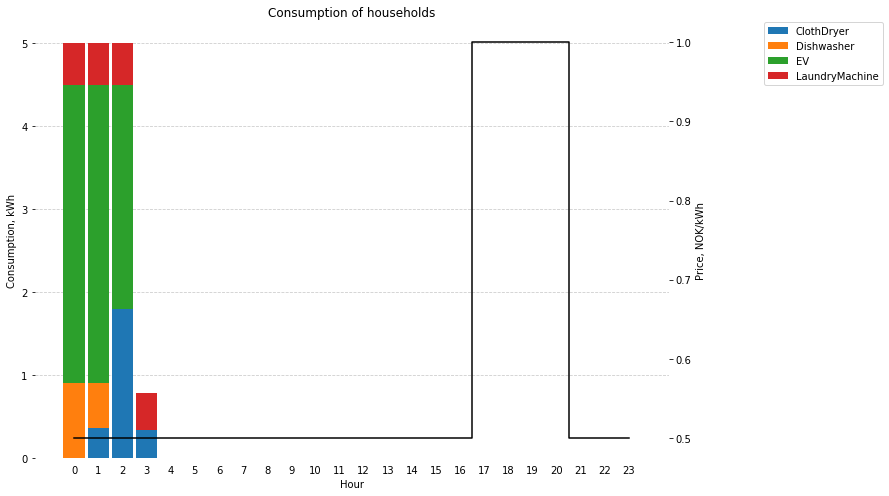

"\nseed = 12\napp_df = appliances()\n\nnonshift_consumption = get_nonshift_consumption(app_df)\nprint(app_df)\napp_shift = app_df[app_df['shiftable'] == 1]\nconsumption = app_shift['consumption'].values\nmaxEnergy = app_shift['maxEnergy'].values\nintervals = app_shift['interval'].values.ravel()\napp_label = app_shift.index\nprint(interval)\nopt(name=app_label, consumption=consumption, maxEnergy=maxEnergy, intervals=intervals, nonshift_consumption=nonshift_consumption)\n"

In [22]:
seed()
price=pricing_scheme(rtp=False)
house = House()
#house.construct(price)

total_price, shift_names, shift_consumption, nonshift_names, nonshift_consumption, nonshift_consumption_total, price = house.construct(price)
power_plots(shift_consumption, nonshift_consumption, shift_names, nonshift_names, price)

'''
seed = 12
app_df = appliances()

nonshift_consumption = get_nonshift_consumption(app_df)
print(app_df)
app_shift = app_df[app_df['shiftable'] == 1]
consumption = app_shift['consumption'].values
maxEnergy = app_shift['maxEnergy'].values
intervals = app_shift['interval'].values.ravel()
app_label = app_shift.index
print(interval)
opt(name=app_label, consumption=consumption, maxEnergy=maxEnergy, intervals=intervals, nonshift_consumption=nonshift_consumption)
'''

### Discussion

## Task 2

C:\Users\Dag\Anaconda3\lib\site-packages\ipykernel_launcher.py:220: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


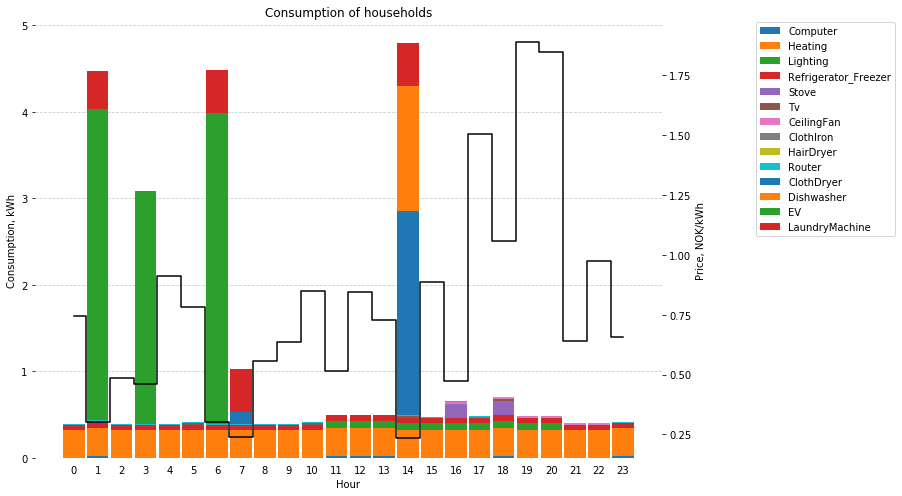

In [23]:
seed()
price=pricing_scheme(rtp=True)
house = House()

total_price, shift_names, shift_consumption, nonshift_names, nonshift_consumption, nonshift_consumption_total, price = house.construct(price, task=2)
power_plots(shift_consumption, nonshift_consumption, shift_names, nonshift_names, price)

### Discution

## Task 3

In [ ]:
shift_hood = np.zeros(24)
nonshift_hood = np.zeros(24)
price=pricing_scheme(rtp=True)
num_houses = 30


for _ in range(num_houses):
    total_price, shift_names, shift_consumption, nonshift_names, nonshift_consumption, nonshift_consumption_total, _  = house.construct(price, task=3)
    total_shift = [shift for shift in shift_consumption]
    shift_hood += np.sum(total_shift, axis=0)
    total_nonshift = [nonshift for nonshift in nonshift_consumption]
    nonshift_hood += np.sum(total_nonshift, axis=0)

power_plots([shift_hood], [nonshift_hood], ['shiftable appliances'], ['nonshiftable appliances'], price)
    

C:\Users\Dag\Anaconda3\lib\site-packages\ipykernel_launcher.py:220: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Dag\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


### Discution

## Conclution